<a href="https://colab.research.google.com/github/johnjustine5646/Lab1_ML/blob/main/2348522_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#data cleaning and handling noisy data

In [24]:
df.isnull().sum()
#no missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df.shape

(10000, 14)

In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df=df.drop(columns=["Surname","Geography","RowNumber","CustomerId"])

In [29]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [31]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,24,2,0,0,1,1,5068,1
1,217,0,23,1,743,0,0,1,5639,0
2,111,0,24,8,5793,2,1,0,5707,1
3,308,0,21,1,0,1,0,0,4704,0
4,459,0,25,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...
9995,380,1,21,5,0,1,1,0,4827,0
9996,125,1,17,10,124,0,1,1,5087,0
9997,318,0,18,7,0,0,0,1,2062,1
9998,381,1,24,3,427,1,1,0,4639,1


In [32]:
from scipy.stats import zscore

In [33]:
zscore_df=df.apply(zscore)

In [34]:
zscore_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.327331,-1.095988,0.293793,-1.041760,-0.958432,-0.911583,0.646092,0.970243,0.024035,1.977165
1,-0.441331,-1.095988,0.198387,-1.387538,-0.608805,-0.911583,-1.547768,0.970243,0.221848,-0.505775
2,-1.539876,-1.095988,0.293793,1.032908,1.767524,2.527057,0.646092,-1.030670,0.245405,1.977165
3,0.501759,-1.095988,0.007575,-1.387538,-0.958432,0.807737,-1.547768,-1.030670,-0.102066,-0.505775
4,2.066668,-1.095988,0.389199,-1.041760,0.780759,-0.911583,0.646092,0.970243,-0.371937,-0.505775
...,...,...,...,...,...,...,...,...,...,...
9995,1.247941,0.912419,0.007575,-0.004426,-0.958432,0.807737,0.646092,-1.030670,-0.059455,-0.505775
9996,-1.394785,0.912419,-0.374048,1.724464,-0.900082,-0.911583,0.646092,0.970243,0.030617,-0.505775
9997,0.605396,-1.095988,-0.278642,0.687130,-0.958432,-0.911583,-1.547768,0.970243,-1.017340,1.977165
9998,1.258304,0.912419,0.293793,-0.695982,-0.757502,0.807737,0.646092,-1.030670,-0.124584,1.977165


In [35]:
zscore_df.sort_values(
    by="NumOfProducts",
    ascending=False
 )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2285,-0.213331,0.912419,1.057039,-0.695982,0.940750,4.246377,0.646092,0.970243,-0.924497,1.977165
6750,-0.337695,-1.095988,0.293793,-1.041760,-0.958432,4.246377,-1.547768,-1.030670,0.198983,1.977165
4606,1.517395,-1.095988,1.534068,1.724464,-0.958432,4.246377,0.646092,0.970243,-0.895050,1.977165
7729,2.066668,-1.095988,-0.374048,-1.041760,0.909693,4.246377,0.646092,-1.030670,-0.437066,1.977165
1488,-0.565695,0.912419,-0.851077,0.341352,0.601005,4.246377,0.646092,-1.030670,-1.019765,1.977165
...,...,...,...,...,...,...,...,...,...,...
4362,-0.824785,-1.095988,-1.614324,-0.695982,0.079154,-0.911583,-1.547768,0.970243,-0.826456,-0.505775
4361,1.351577,-1.095988,0.866228,1.378686,-0.630922,-0.911583,0.646092,-1.030670,0.435250,1.977165
4359,-1.094240,-1.095988,0.484604,-1.041760,0.862166,-0.911583,0.646092,-1.030670,0.151869,-0.505775
4355,0.066487,-1.095988,0.007575,-0.350204,-0.677978,-0.911583,0.646092,-1.030670,-0.045598,-0.505775


In [36]:
outlier=((zscore_df>3)|(zscore_df<-3)).sum()
outlier

CreditScore          0
Gender               0
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [37]:
outlier_mask = (zscore_df > 3) | (zscore_df < -3)

# Find rows where at least one z-score is an outlier
outlier_rows = np.any(outlier_mask, axis=1)

# Filter out rows with outliers
cleaned_df = zscore_df[~outlier_rows]

In [38]:
outlier=((cleaned_df>3)|(cleaned_df<-3)).sum()
outlier

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
shape = cleaned_df.shape
num_rows, num_columns = shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9807
Number of columns: 10


In [41]:
#data integration


In [43]:
df=cleaned_df

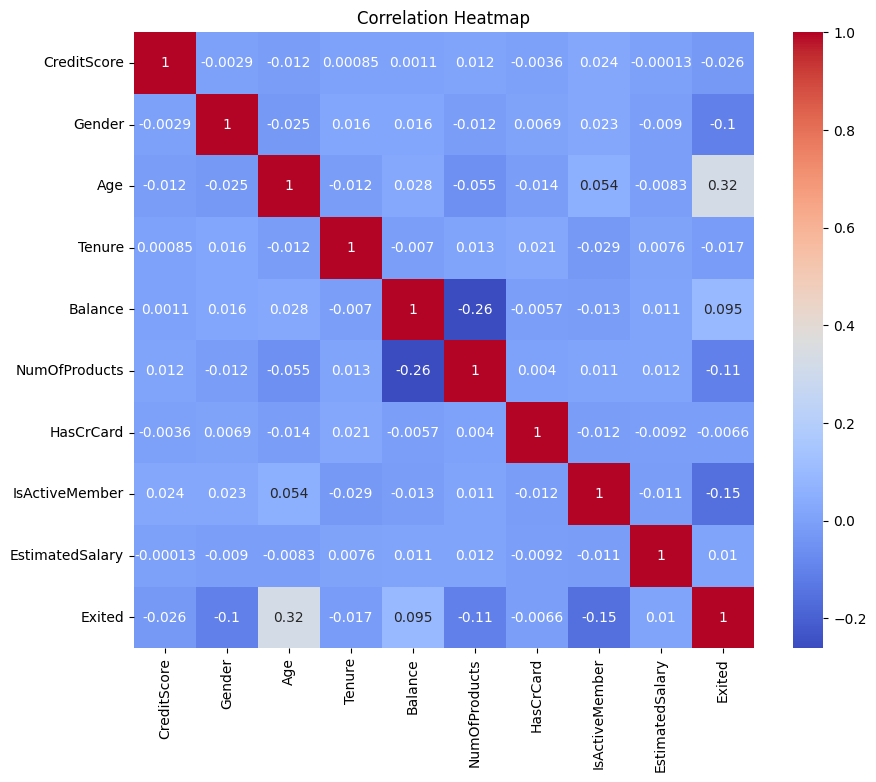

In [45]:
# Calculate correlations
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

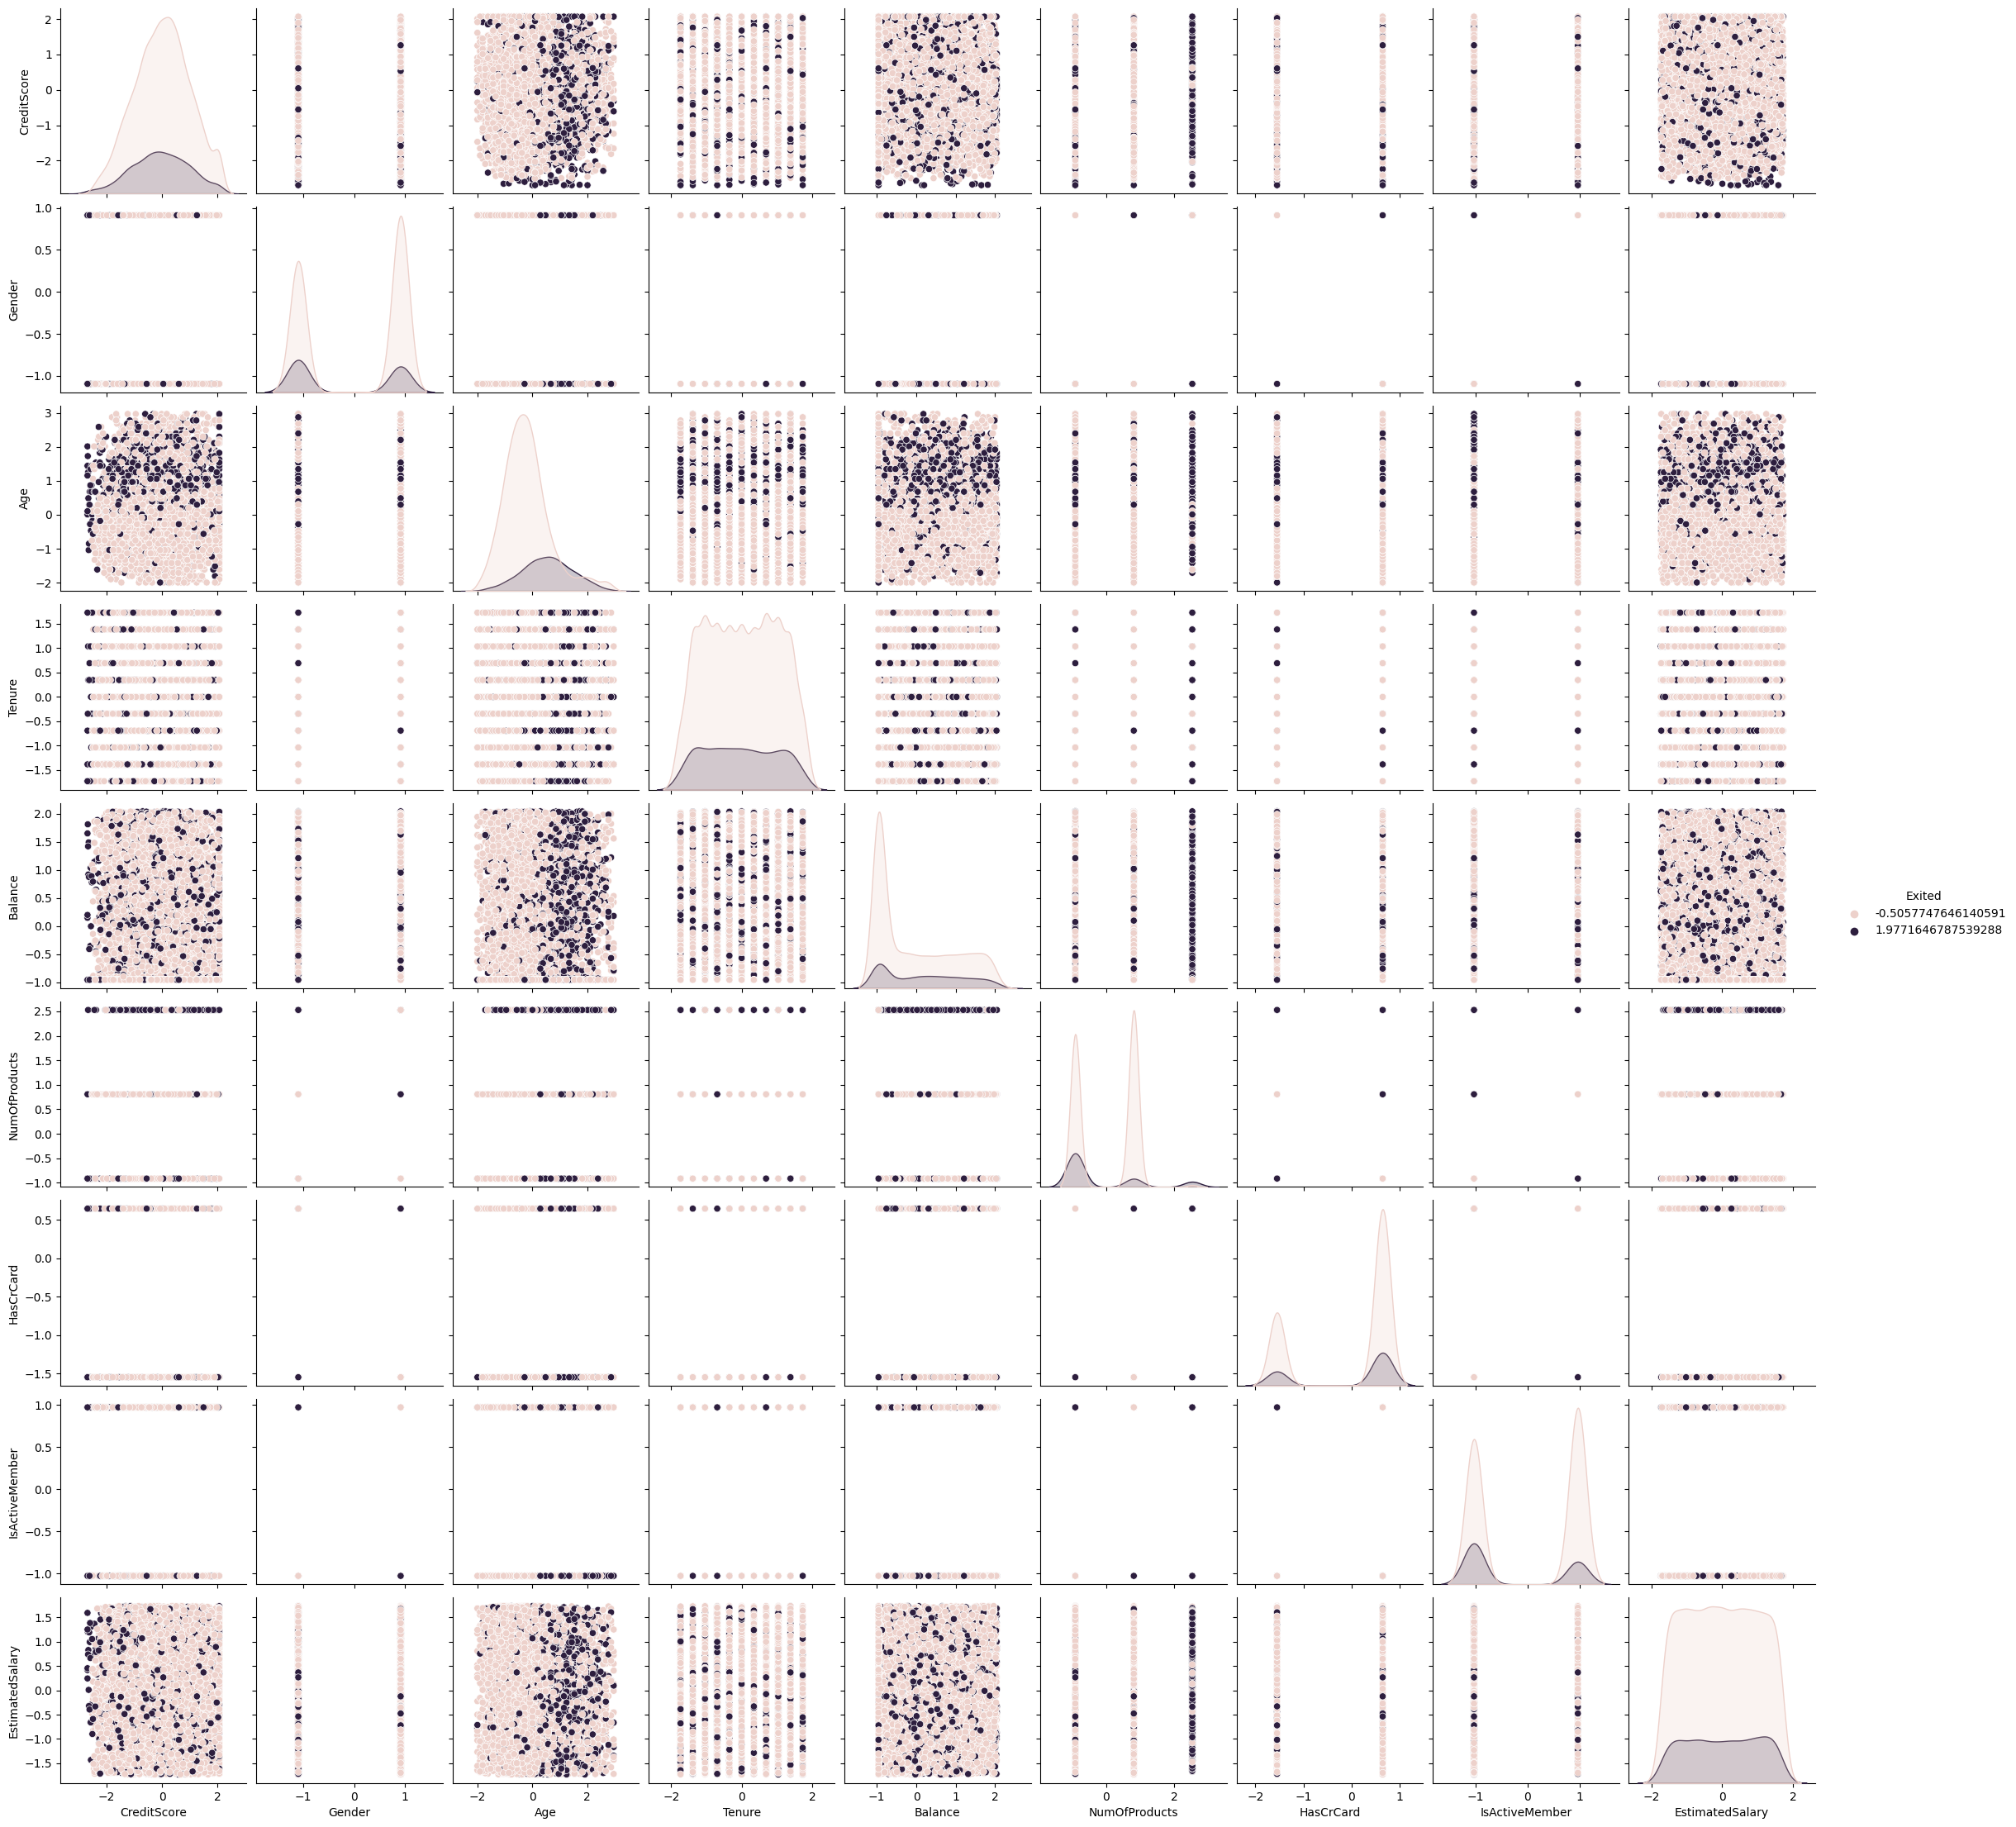

In [50]:
sns.pairplot(df, hue="Exited", diag_kind="kde")
plt.show()

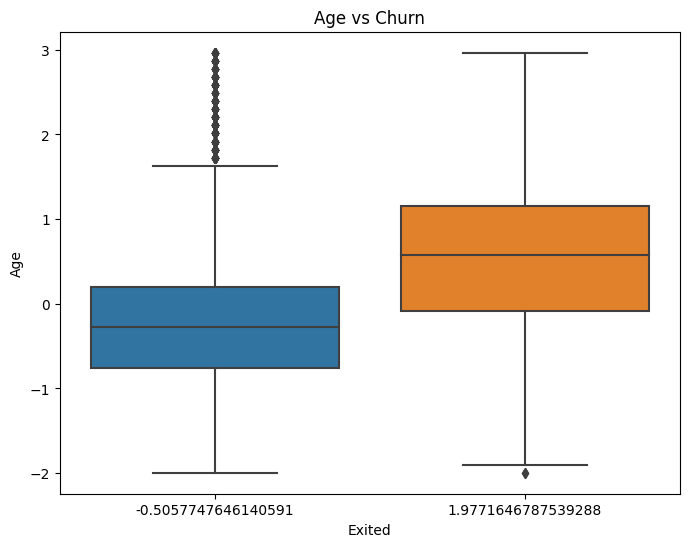

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Exited", y="Age")
plt.title("Age vs Churn")
plt.show()

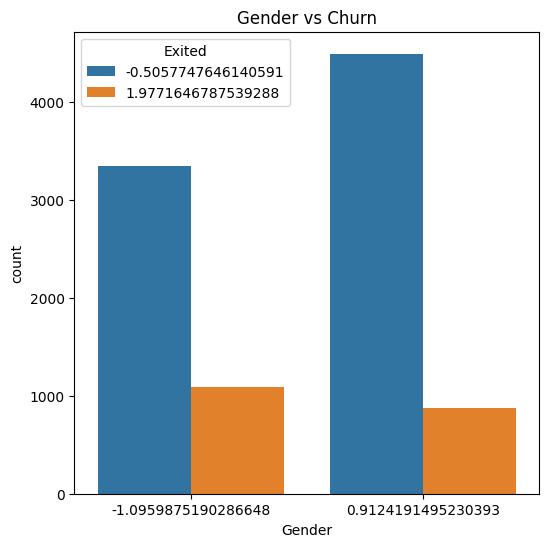

In [54]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Gender vs Churn")
plt.show()

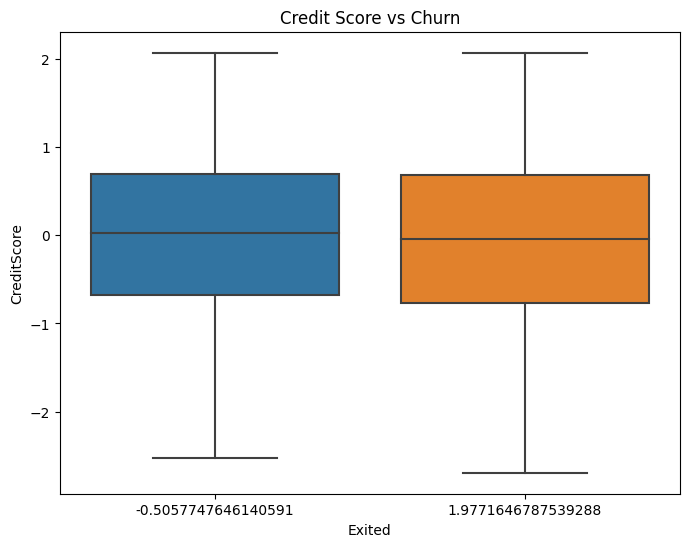

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("Credit Score vs Churn")
plt.show()

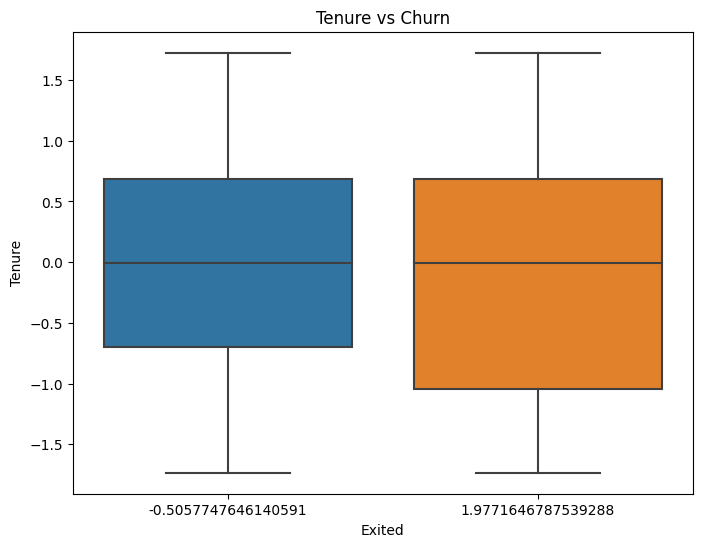

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Exited", y="Tenure")
plt.title("Tenure vs Churn")
plt.show()

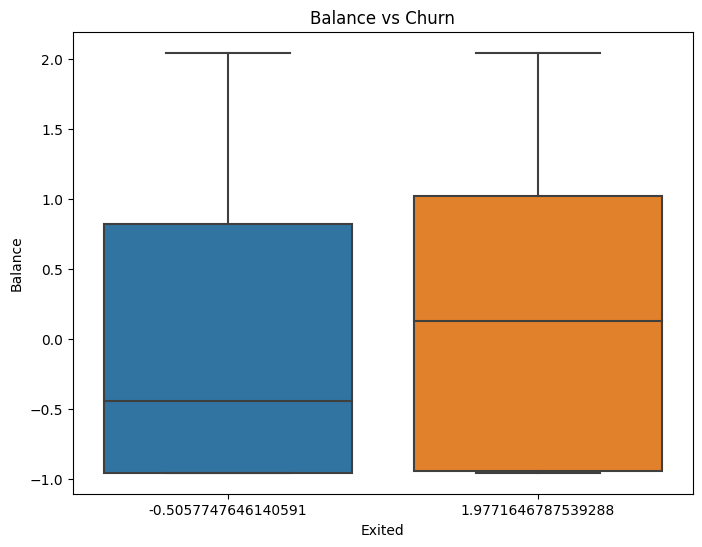

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,  x="Exited", y="Balance")
plt.title("Balance vs Churn")
plt.show()

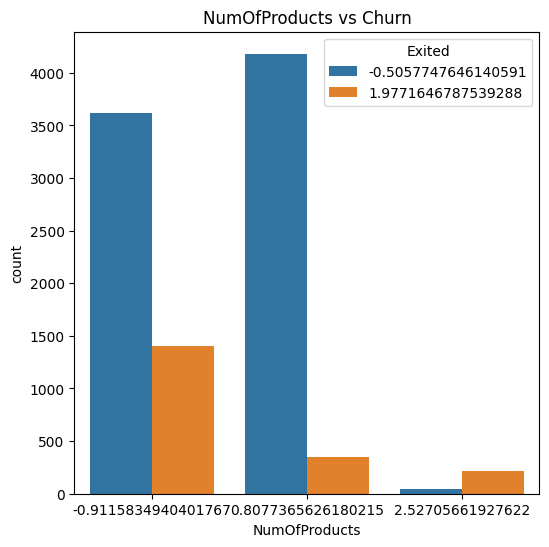

In [61]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title("NumOfProducts vs Churn")
plt.show()

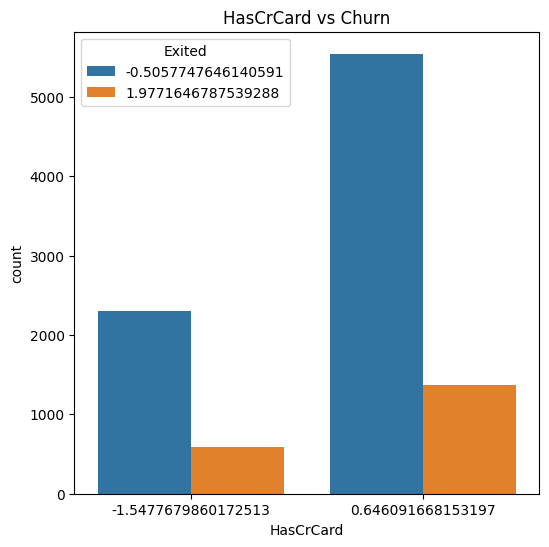

In [62]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="HasCrCard", hue="Exited")
plt.title("HasCrCard vs Churn")
plt.show()

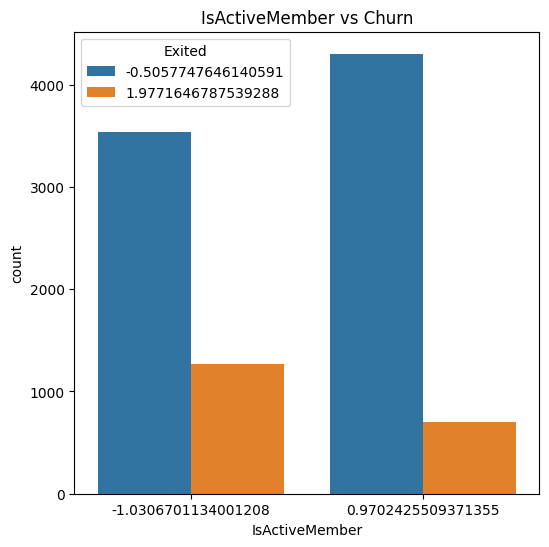

In [63]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="IsActiveMember", hue="Exited")
plt.title("IsActiveMember vs Churn")
plt.show()

In [68]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scalaled_col = ['CreditScore', 'Age', 'Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df[scalaled_col] = scaler.fit_transform(df[scalaled_col])
print(df.head())

   CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0     0.496732 -1.095988  0.461538 -1.041760  0.000000            0.0   
1     0.472767 -1.095988  0.442308 -1.387538  0.116439            0.0   
2     0.241830 -1.095988  0.461538  1.032908  0.907851            1.0   
3     0.671024 -1.095988  0.403846 -1.387538  0.000000            0.5   
4     1.000000 -1.095988  0.480769 -1.041760  0.579220            0.0   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited  
0   0.646092        0.970243         0.506901  1.977165  
1  -1.547768        0.970243         0.564013 -0.505775  
2   0.646092       -1.030670         0.570814  1.977165  
3  -1.547768       -1.030670         0.470494 -0.505775  
4   0.646092        0.970243         0.392579 -0.505775  


<ipython-input-68-cfb5ef819df3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scalaled_col] = scaler.fit_transform(df[scalaled_col])


In [69]:
from sklearn.decomposition import PCA

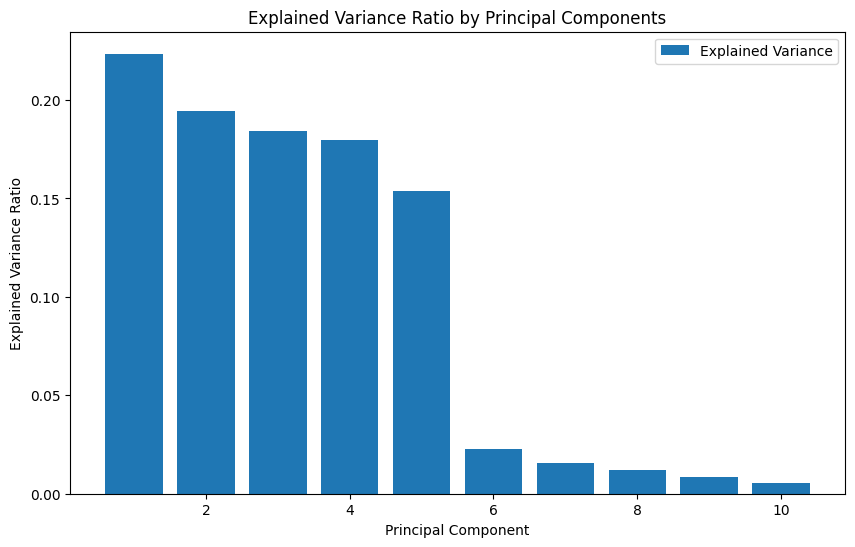

Explained Variance for PC1: 0.2235
Explained Variance for PC2: 0.1946
Explained Variance for PC3: 0.1844
Explained Variance for PC4: 0.1798
Explained Variance for PC5: 0.1536
Explained Variance for PC6: 0.0227
Explained Variance for PC7: 0.0156
Explained Variance for PC8: 0.0119
Explained Variance for PC9: 0.0083
Explained Variance for PC10: 0.0057
   CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0     0.496732 -1.095988  0.461538 -1.041760  0.000000            0.0   
1     0.472767 -1.095988  0.442308 -1.387538  0.116439            0.0   
2     0.241830 -1.095988  0.461538  1.032908  0.907851            1.0   
3     0.671024 -1.095988  0.403846 -1.387538  0.000000            0.5   
4     1.000000 -1.095988  0.480769 -1.041760  0.579220            0.0   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited       PC1       PC2  \
0   0.646092        0.970243         0.506901  1.977165  1.250119  1.135233   
1  -1.547768        0.970243         0.564013 -0.505

In [71]:
pca = PCA()
pca_result = pca.fit_transform(df)


explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()


for i, ratio in enumerate(explained_variance, start=1):
    print(f"Explained Variance for PC{i}: {ratio:.4f}")


n_components = 3


pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df)


pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

df_with_pca = pd.concat([df, pca_df], axis=1)


print(df_with_pca.head())

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

X_balance = df[['Balance']]


n_bins = 4
strategy = 'quantile'
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

X_balance_binned = bin_encoder.fit_transform(X_balance)

binned_balance_df = pd.DataFrame(X_balance_binned, columns=['Balance_bin'])

churn_with_binned_balance = pd.concat([df, binned_balance_df], axis=1)

print(churn_with_binned_balance.head())


   CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0     0.496732 -1.095988  0.461538 -1.041760  0.000000            0.0   
1     0.472767 -1.095988  0.442308 -1.387538  0.116439            0.0   
2     0.241830 -1.095988  0.461538  1.032908  0.907851            1.0   
3     0.671024 -1.095988  0.403846 -1.387538  0.000000            0.5   
4     1.000000 -1.095988  0.480769 -1.041760  0.579220            0.0   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited  Balance_bin  
0   0.646092        0.970243         0.506901  1.977165          0.0  
1  -1.547768        0.970243         0.564013 -0.505775          0.0  
2   0.646092       -1.030670         0.570814  1.977165          2.0  
3  -1.547768       -1.030670         0.470494 -0.505775          0.0  
4   0.646092        0.970243         0.392579 -0.505775          1.0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


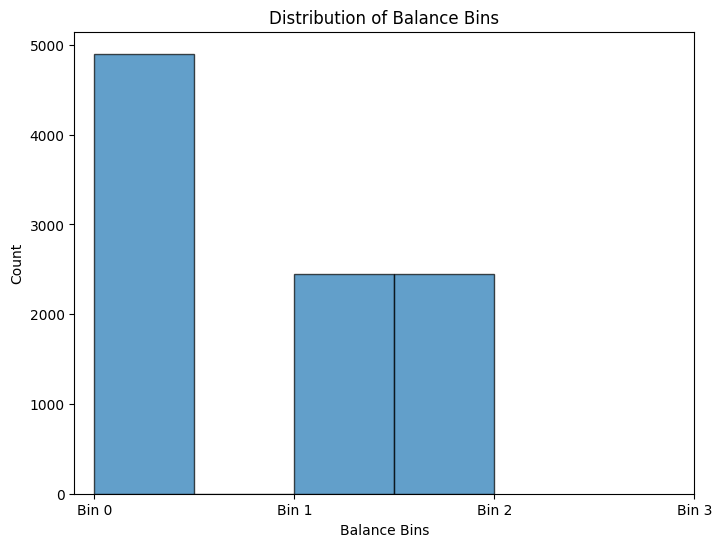

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(churn_with_binned_balance['Balance_bin'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Balance Bins')
plt.ylabel('Count')
plt.title('Distribution of Balance Bins')
plt.xticks(range(n_bins), [f'Bin {i}' for i in range(n_bins)])
plt.show()